[[  60]
 [  70]
 [  80]
 [ 100]
 [ 120]
 [ 150]
 [ 200]
 [ 250]
 [ 300]
 [ 400]
 [ 500]
 [ 750]
 [1000]
 [2000]
 [3000]]
[  60   70   80  100  120  150  200  250  300  400  500  750 1000 2000
 3000]


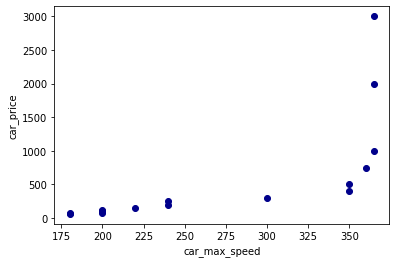

,car_price,car_max_speed
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("polynomial-regression.csv",sep = ";")

x = df.car_max_speed.values.reshape(-1,1,order = 'F') # array reshaped with ordeered array, fortran like ordered
y = df.car_price.values.reshape(-1,1)
d = df.car_price.values#reshape(-1,1,order = 'F')

print(y)
print(d)# it isnt change i think fortrant order is same with normal order

plt.scatter(x,y,color = '#00008B') # dark blue colooring
plt.xlabel("car_max_speed")
plt.ylabel("car_price")
plt.show()

df.head()# looking head of data 

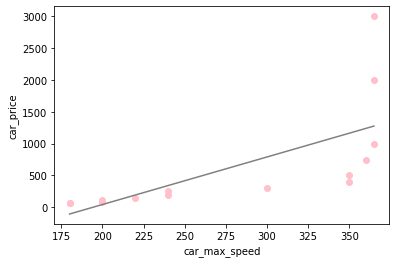

99 million TL car speed estimation:  [[738021.03627974]]


In [20]:
# linear regression =  y = b0 + b1*x
# multiple linear regression   y = b0 + b1*x1 + b2*x2

# %% linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x,y)

#%% predict
y_head = lr.predict(x)

plt.scatter(x,y,color = 'pink')
plt.xlabel("car_max_speed")
plt.ylabel("car_price")

plt.plot(x,y_head,color="gray",label ="linear")
plt.show()

print("99 million TL car speed estimation: ",lr.predict([[99000]]))

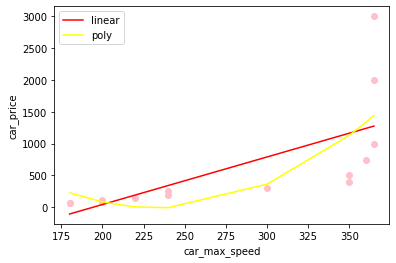

r_square score for linear regression:  0.4745823761330057
r_square score for polynomial regression:  0.5540532844839934


In [25]:
# %%
# polynomial regression =  y = b0 + b1*x +b2*x^2 + b3*x^3 + ... + bn*x^n

from sklearn.preprocessing import PolynomialFeatures
polynomial_regression = PolynomialFeatures(degree = 2)

x_polynomial = polynomial_regression.fit_transform(x)


# %% fit
linear_regression2 = LinearRegression()
linear_regression2.fit(x_polynomial,y)

# %%

y_head2 = linear_regression2.predict(x_polynomial)# polynomal defining

plt.scatter(x,y,color = 'pink')
plt.xlabel("car_max_speed")
plt.ylabel("car_price")
plt.plot(x,y_head,color="red",label ="linear")

plt.plot(x,y_head2,color= "yellow",label = "poly")
plt.legend()# legend is putting info right of corners about the graphics
plt.show()



#%%
from sklearn.metrics import r2_score

#mean square error also called r2_score and here we calling it as r2_score

print("r_square score for linear regression: ", r2_score(y,y_head))

print("r_square score for polynomial regression: ", r2_score(y,y_head2))
